# Ford Go Bike Trip Data (Explanatory Analysis)
##### by Karim El-Dweky

## Investigation Overview

> Explanatory data visualization techniques are used after generating your findings, and are used to help communicate your results to others. Understanding design considerations will make sure that your message is clear and effective. In addition to being a good producer of visualizations, going through this project will also help you be a good consumer of visualizations that are presented to you by others.

## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

> The dataset used for this explanatory analysis consists of monthly individual trip data during February 2019 in CSV format contain approximately 163,341 rows.

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [35]:
# load in the dataset into a pandas dataframe

df_cleaned = pd.read_csv('fordgobike-cleaned.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019-02-28,Thu,17,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019-02-28,Thu,12,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019-02-28,Thu,17,30.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019-02-28,Thu,23,45.0
4,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,2019-02-28,Thu,23,36.0


## (Visualization 1) Percentage Of Each User Type And Their Daily Usage

> Subscribers contributed the majority of the usage, about 90%, while about 10% were consumed by cusomters. 

>Subscribers use the service for work commnute thus most trips were on work days (Mon-Fri) and at minimum in weekends, whereas customers tend to ride for fun so the trips count consider the same among the whole week.

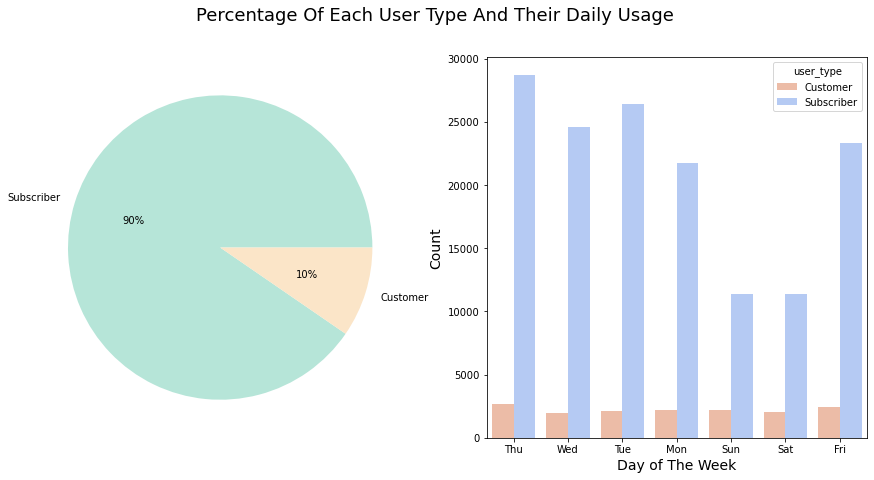

In [36]:
# Plotting Count And Percentage Of Each User Type

plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)
plt.pie(df_cleaned.user_type.value_counts(),
        labels = df_cleaned.user_type.value_counts().keys(), 
        colors = ['#B6E5D8', '#FBE5C8'],
        autopct='%1.0f%%')

plt.subplot(1, 2, 2)
sb.countplot(data = df_cleaned, x = 'start_day', hue = 'user_type', palette = 'coolwarm_r')
plt.xlabel('Day of The Week', fontsize=14)
plt.ylabel('Count', fontsize=14)      

plt.suptitle('Percentage Of Each User Type And Their Daily Usage', fontsize=18);

## (Visualization 2) Percentage Of Each Member Gender And Their Hourly Usage During The Day

> Males contributed the majority of the usage, about 74%, while about 24% were consumed by Females and about 2% by Others. 

>All Genders use the service for work commnute thus most trips were rush hours 8 am & 5 pm (when going to work in the morning and getting off work in the afternoon), However there is a percentage of  customers tend to ride for fun in the afternoon or early evenings.

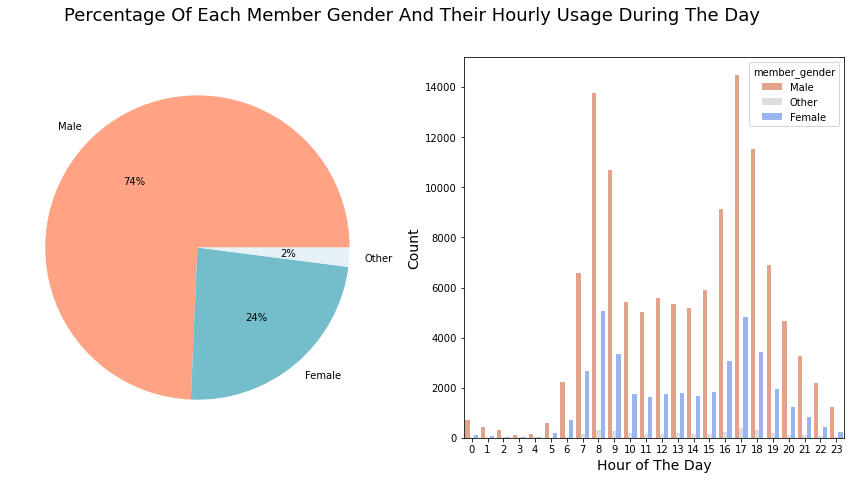

In [37]:
# Plotting Count And Percentage Of Each User Type

plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)
plt.pie(df_cleaned.member_gender.value_counts(),
        labels = df_cleaned.member_gender.value_counts().keys(), 
        colors = ['#FFA384', '#74BDCB', '#E7F2F8'],
        autopct='%1.0f%%')

plt.subplot(1, 2, 2)
sb.countplot(data = df_cleaned, x = 'start_hour', hue = 'member_gender', palette = 'coolwarm_r')
plt.xlabel('Hour of The Day', fontsize=14)
plt.ylabel('Count', fontsize=14)      

plt.suptitle('Percentage Of Each Member Gender And Their Hourly Usage During The Day', fontsize=18);

## (Visualization 3) The Average Trip Duration Per Days Of The Week Vs. Gender

> The figure shows that males trips are much quicker compared to females & Others on each day of the week. For the latters The trip duration increases during weekends which means that Females and Others users are more likely enjoying the service more than just a ride.

<Figure size 1080x504 with 0 Axes>

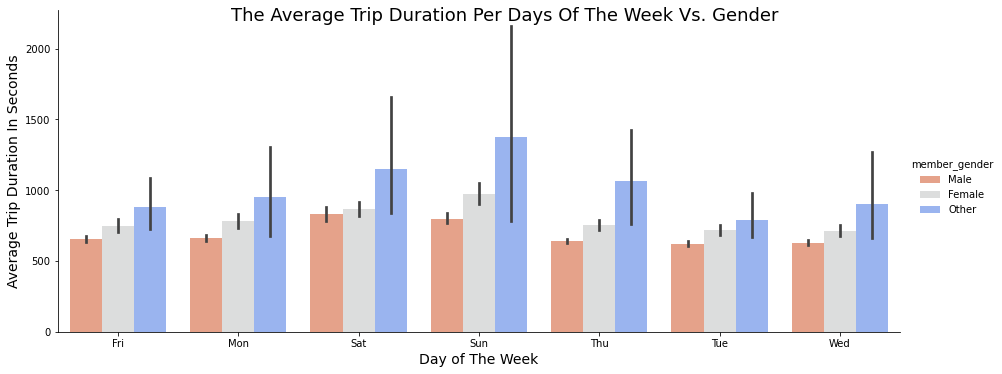

In [38]:
# Plotting The Average Trip Duration Per Days Of The Week Vs. Gender

plt.figure(figsize = [15, 7])
sb.catplot(data = df_sort, x = 'start_day', y = 'duration_sec', hue ='member_gender', 
             kind = 'bar', aspect = 2.5, palette = 'coolwarm_r')
plt.xlabel('Day of The Week', fontsize=14)
plt.ylabel('Average Trip Duration In Seconds', fontsize=14)
plt.suptitle('The Average Trip Duration Per Days Of The Week Vs. Gender', fontsize=18);